In [1]:
import torch
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
sys.path.append('../')
from dataloader import get_train_and_validation_dataloader, patch_extractor

In [2]:
# Creating of Patch Extractor.
train_dataloader, validation_dataloader = get_train_and_validation_dataloader(root_dataset_dir="../../../../../../Dataset/LowDoseCTGrandChallenge/Training_Image_Data", shuffle=False)

number of image paths :  15152
number of image paths :  1472
Train and validation data image len : 954576, 92736


In [3]:
# Test to check the number of patches per image.
# The format is : number_of_images_in_batch, patch_count, patch_height, patch_width, num_channels
data = next(iter(train_dataloader))
print('len of images in batch : ', len(data))
print('shape of each image in batch : ', data[0].shape)

len of images in batch :  2
shape of each image in batch :  torch.Size([64, 64, 64, 1])


In [4]:
print(next(iter(train_dataloader))[0].shape)
test_image = next(iter(train_dataloader))[0]

torch.Size([64, 64, 64, 1])


In [5]:
test_image = torch.transpose(test_image, 1, 3)
print(test_image.shape)

torch.Size([64, 1, 64, 64])


In [7]:
import torch
from pytorch_wavelets import DTCWTForward, DTCWTInverse
xfm = DTCWTForward(J=3).cuda()
yl, yh = xfm(test_image.cuda())

In [8]:
fine_highpass, coarse_highpass, coarse_highpass = yh[0], yh[1], yh[2]

In [9]:
print(yl.shape)
yl = torch.transpose(yl, 1, 3)
yl.shape

torch.Size([64, 1, 16, 16])


torch.Size([64, 16, 16, 1])

In [13]:
fine_highpass.shape
# The shape is NC6HW2
# 6 is for orientation
# 2 is for real and imaginary numbers

torch.Size([64, 1, 6, 32, 32, 2])

In [14]:
def get_high_freq_band_for_orientation(band, orientation_index, real_or_complex):
    x = band[:,:,orientation_index,:,:,real_or_complex]
    x = torch.transpose(x, 1, 3)
    print(x.shape)
    
    return x


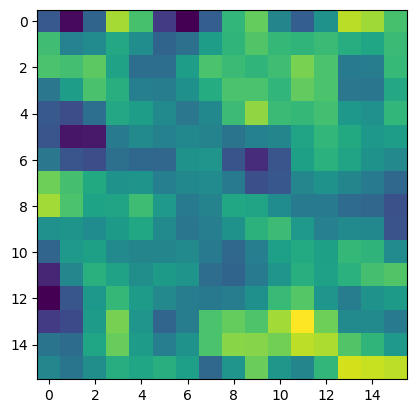

In [15]:
import matplotlib.pyplot as plt
plt.imshow(yl[0].cpu().numpy())

torch.Size([64, 16, 16, 1])


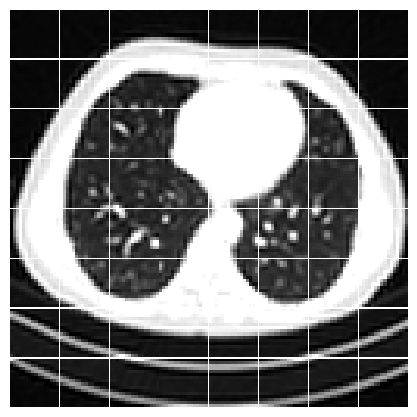

torch.Size([64, 32, 32, 1])
torch.Size([64, 32, 32, 1])


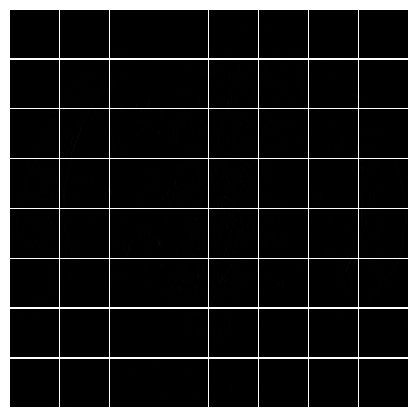

torch.Size([64, 32, 32, 1])
torch.Size([64, 32, 32, 1])


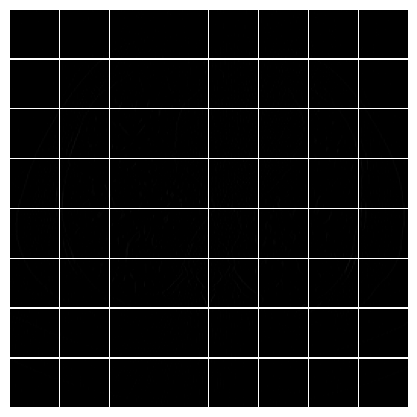

torch.Size([64, 32, 32, 1])
torch.Size([64, 32, 32, 1])


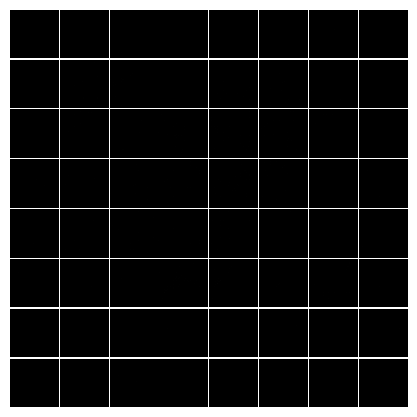

torch.Size([64, 32, 32, 1])
torch.Size([64, 32, 32, 1])


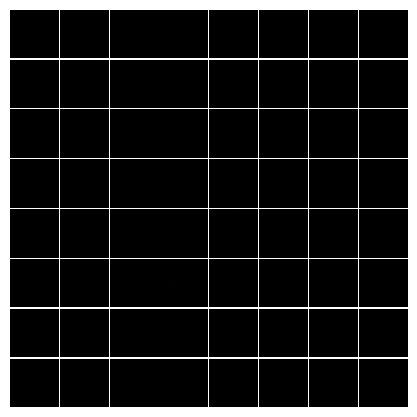

torch.Size([64, 32, 32, 1])
torch.Size([64, 32, 32, 1])


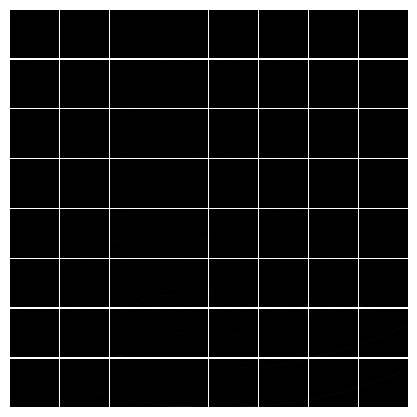

torch.Size([64, 32, 32, 1])
torch.Size([64, 32, 32, 1])


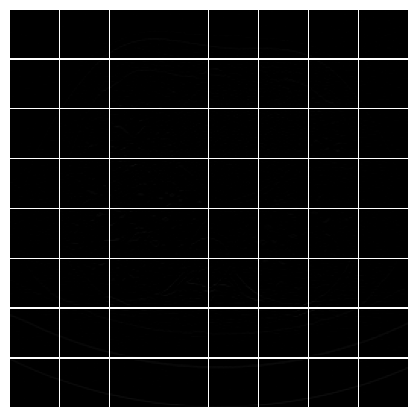

torch.Size([64, 32, 32, 1])
torch.Size([64, 32, 32, 1])


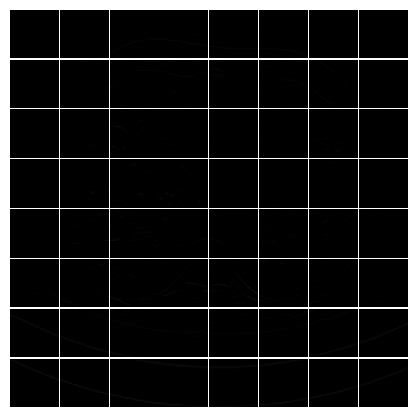

torch.Size([64, 32, 32, 1])
torch.Size([64, 32, 32, 1])


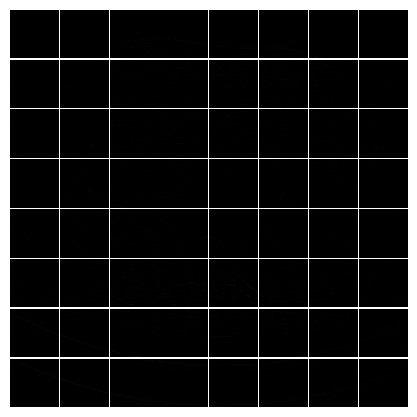

torch.Size([64, 32, 32, 1])
torch.Size([64, 32, 32, 1])


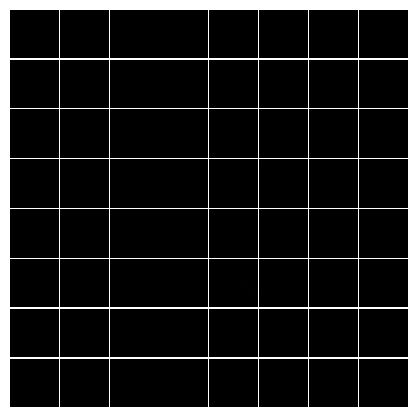

torch.Size([64, 32, 32, 1])
torch.Size([64, 32, 32, 1])


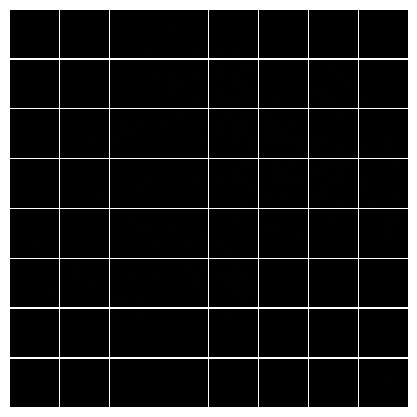

torch.Size([64, 32, 32, 1])
torch.Size([64, 32, 32, 1])


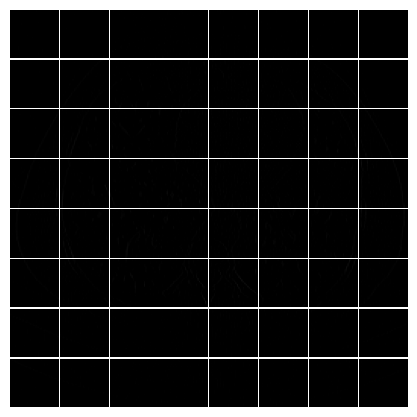

torch.Size([64, 32, 32, 1])
torch.Size([64, 32, 32, 1])


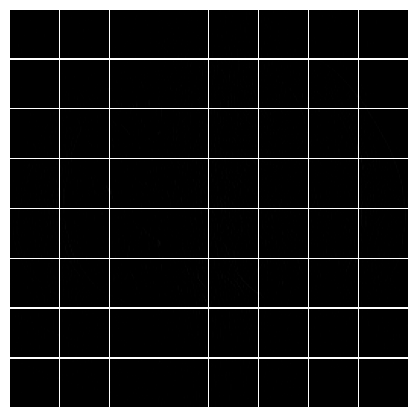

IndexError: index 6 is out of bounds for dimension 2 with size 6

In [21]:
def display_patches_in_grid(image):
    print(image.shape)
    patch_count, patch_height, patch_width, num_channels = image.shape
    
    plt.figure(figsize=(4,4))
    
    for i in range(patch_count):
        plt.subplot(8, 8, i + 1)
        plt.imshow(image[i], cmap='gray', vmin=0, vmax=1)
        plt.axis('off')
        
    plt.tight_layout(pad=0.1)
    plt.show()
    
display_patches_in_grid(yl.cpu())
display_patches_in_grid(get_high_freq_band_for_orientation(fine_highpass, 0, 0).cpu())
display_patches_in_grid(get_high_freq_band_for_orientation(fine_highpass, 0, 1).cpu())
display_patches_in_grid(get_high_freq_band_for_orientation(fine_highpass, 1, 0).cpu())
display_patches_in_grid(get_high_freq_band_for_orientation(fine_highpass, 1, 1).cpu())
display_patches_in_grid(get_high_freq_band_for_orientation(fine_highpass, 2, 0).cpu())
display_patches_in_grid(get_high_freq_band_for_orientation(fine_highpass, 2, 1).cpu())
display_patches_in_grid(get_high_freq_band_for_orientation(fine_highpass, 3, 0).cpu())
display_patches_in_grid(get_high_freq_band_for_orientation(fine_highpass, 3, 1).cpu())
display_patches_in_grid(get_high_freq_band_for_orientation(fine_highpass, 4, 0).cpu())
display_patches_in_grid(get_high_freq_band_for_orientation(fine_highpass, 4, 1).cpu())
display_patches_in_grid(get_high_freq_band_for_orientation(fine_highpass, 5, 0).cpu())
display_patches_in_grid(get_high_freq_band_for_orientation(fine_highpass, 5, 1).cpu())

torch.Size([64, 16, 16, 1])
torch.Size([64, 16, 16, 1])


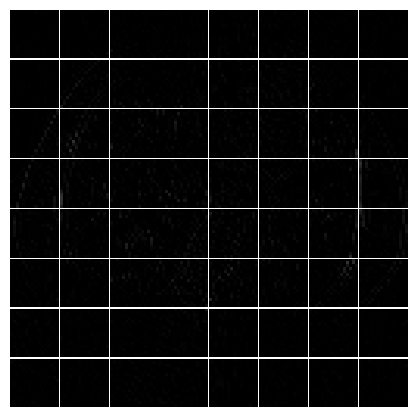

torch.Size([64, 16, 16, 1])
torch.Size([64, 16, 16, 1])


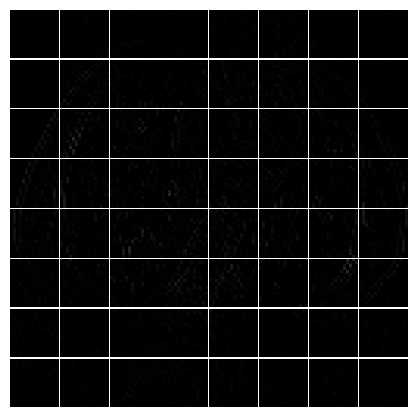

torch.Size([64, 16, 16, 1])
torch.Size([64, 16, 16, 1])


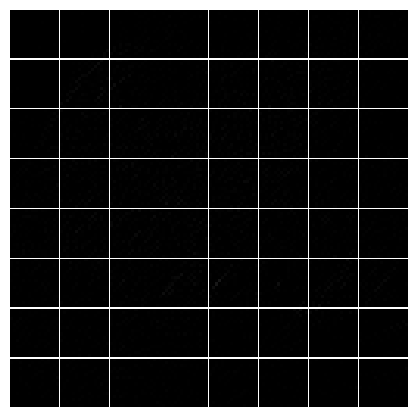

torch.Size([64, 16, 16, 1])
torch.Size([64, 16, 16, 1])


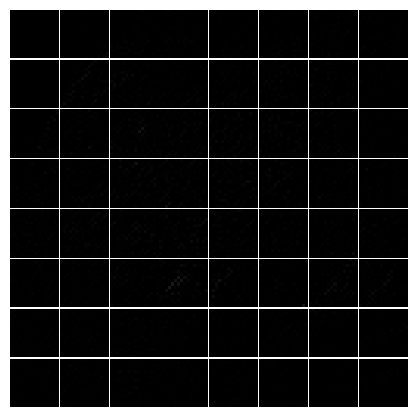

torch.Size([64, 16, 16, 1])
torch.Size([64, 16, 16, 1])


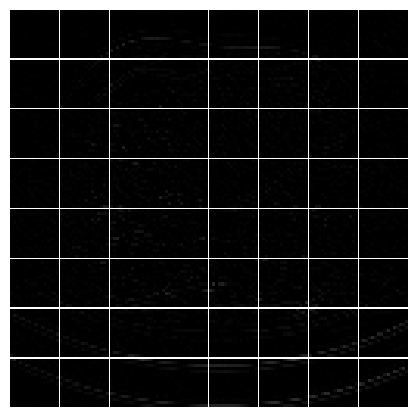

torch.Size([64, 16, 16, 1])
torch.Size([64, 16, 16, 1])


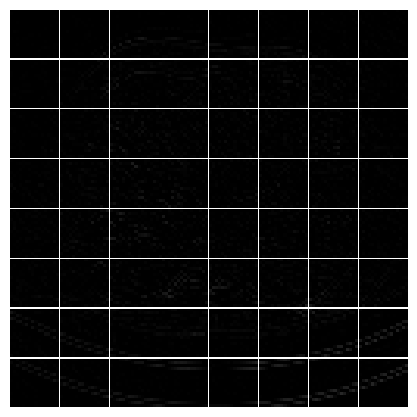

torch.Size([64, 16, 16, 1])
torch.Size([64, 16, 16, 1])


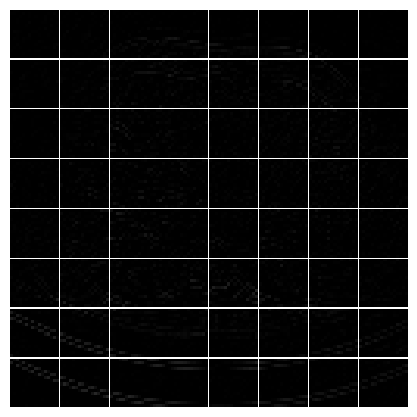

torch.Size([64, 16, 16, 1])
torch.Size([64, 16, 16, 1])


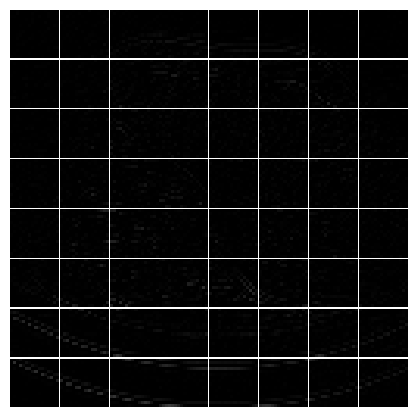

torch.Size([64, 16, 16, 1])
torch.Size([64, 16, 16, 1])


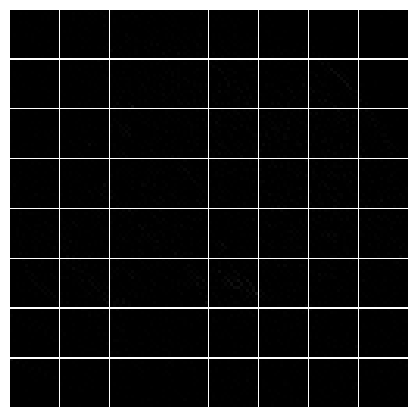

torch.Size([64, 16, 16, 1])
torch.Size([64, 16, 16, 1])


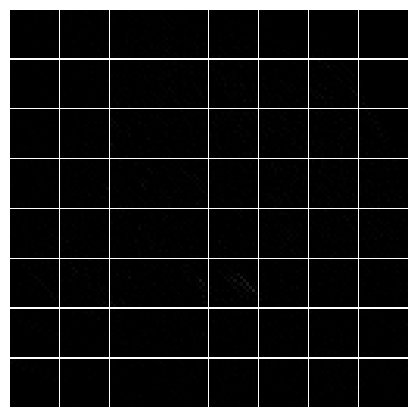

torch.Size([64, 16, 16, 1])
torch.Size([64, 16, 16, 1])


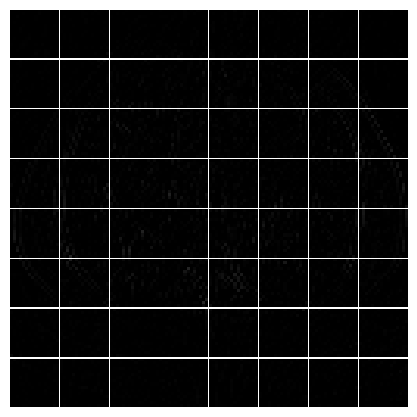

torch.Size([64, 16, 16, 1])
torch.Size([64, 16, 16, 1])


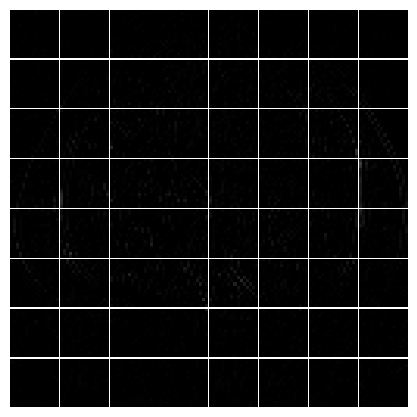

In [24]:
display_patches_in_grid(get_high_freq_band_for_orientation(mid_highpass, 0, 0).cpu())
display_patches_in_grid(get_high_freq_band_for_orientation(mid_highpass, 0, 1).cpu())
display_patches_in_grid(get_high_freq_band_for_orientation(mid_highpass, 1, 0).cpu())
display_patches_in_grid(get_high_freq_band_for_orientation(mid_highpass, 1, 1).cpu())
display_patches_in_grid(get_high_freq_band_for_orientation(mid_highpass, 2, 0).cpu())
display_patches_in_grid(get_high_freq_band_for_orientation(mid_highpass, 2, 1).cpu())
display_patches_in_grid(get_high_freq_band_for_orientation(mid_highpass, 3, 0).cpu())
display_patches_in_grid(get_high_freq_band_for_orientation(mid_highpass, 3, 1).cpu())
display_patches_in_grid(get_high_freq_band_for_orientation(mid_highpass, 4, 0).cpu())
display_patches_in_grid(get_high_freq_band_for_orientation(mid_highpass, 4, 1).cpu())
display_patches_in_grid(get_high_freq_band_for_orientation(mid_highpass, 5, 0).cpu())
display_patches_in_grid(get_high_freq_band_for_orientation(mid_highpass, 5, 1).cpu())


torch.Size([64, 8, 8, 1])
torch.Size([64, 8, 8, 1])


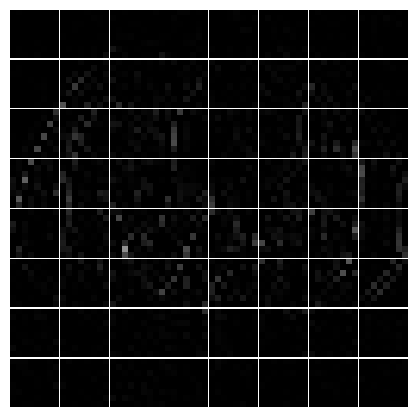

torch.Size([64, 8, 8, 1])
torch.Size([64, 8, 8, 1])


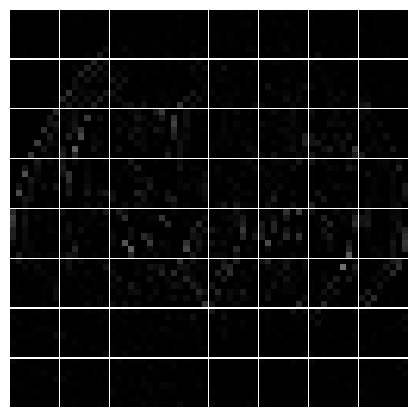

torch.Size([64, 8, 8, 1])
torch.Size([64, 8, 8, 1])


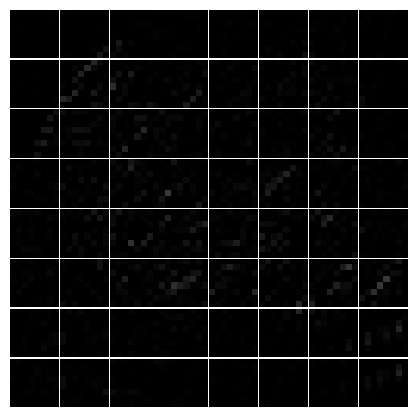

torch.Size([64, 8, 8, 1])
torch.Size([64, 8, 8, 1])


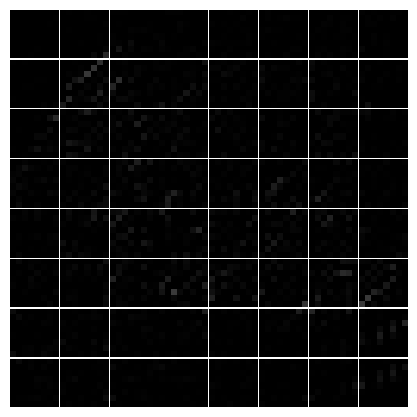

torch.Size([64, 8, 8, 1])
torch.Size([64, 8, 8, 1])


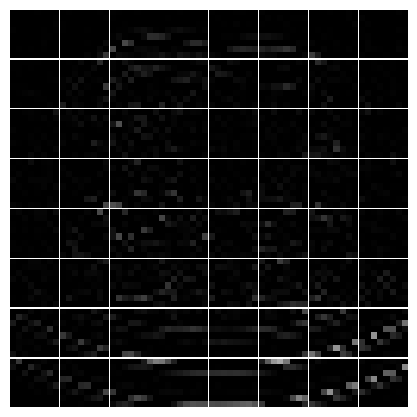

torch.Size([64, 8, 8, 1])
torch.Size([64, 8, 8, 1])


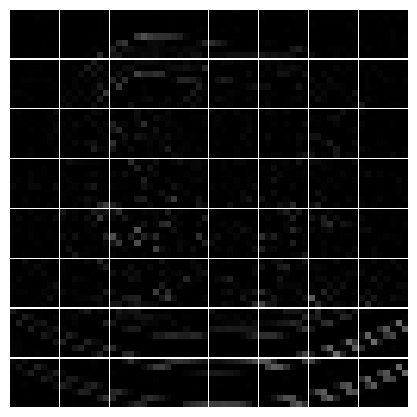

torch.Size([64, 8, 8, 1])
torch.Size([64, 8, 8, 1])


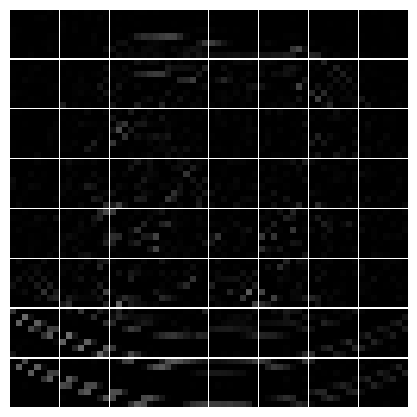

torch.Size([64, 8, 8, 1])
torch.Size([64, 8, 8, 1])


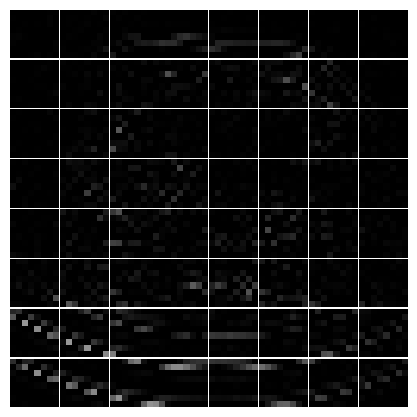

torch.Size([64, 8, 8, 1])
torch.Size([64, 8, 8, 1])


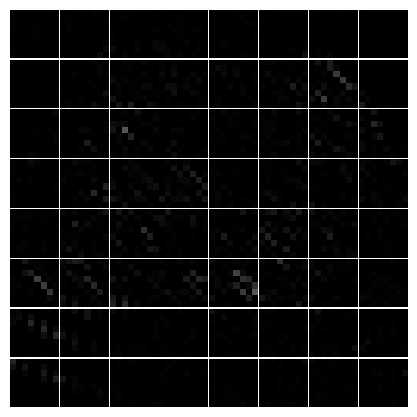

torch.Size([64, 8, 8, 1])
torch.Size([64, 8, 8, 1])


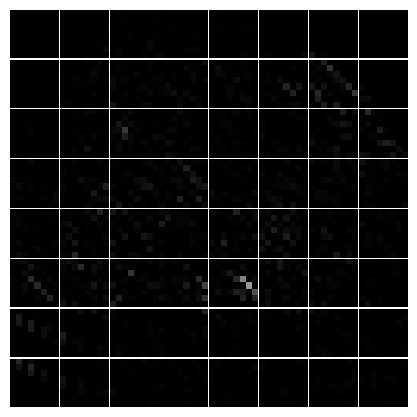

torch.Size([64, 8, 8, 1])
torch.Size([64, 8, 8, 1])


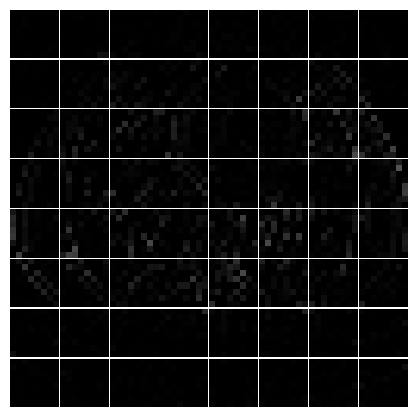

torch.Size([64, 8, 8, 1])
torch.Size([64, 8, 8, 1])


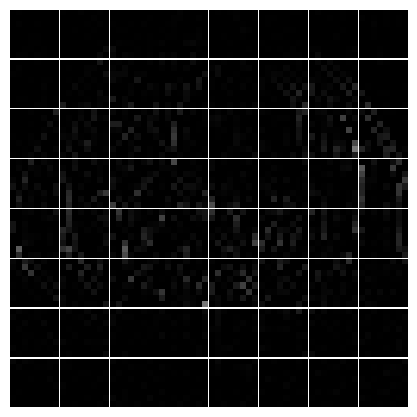

In [25]:
display_patches_in_grid(get_high_freq_band_for_orientation(coarse_highpass, 0, 0).cpu())
display_patches_in_grid(get_high_freq_band_for_orientation(coarse_highpass, 0, 1).cpu())
display_patches_in_grid(get_high_freq_band_for_orientation(coarse_highpass, 1, 0).cpu())
display_patches_in_grid(get_high_freq_band_for_orientation(coarse_highpass, 1, 1).cpu())
display_patches_in_grid(get_high_freq_band_for_orientation(coarse_highpass, 2, 0).cpu())
display_patches_in_grid(get_high_freq_band_for_orientation(coarse_highpass, 2, 1).cpu())
display_patches_in_grid(get_high_freq_band_for_orientation(coarse_highpass, 3, 0).cpu())
display_patches_in_grid(get_high_freq_band_for_orientation(coarse_highpass, 3, 1).cpu())
display_patches_in_grid(get_high_freq_band_for_orientation(coarse_highpass, 4, 0).cpu())
display_patches_in_grid(get_high_freq_band_for_orientation(coarse_highpass, 4, 1).cpu())
display_patches_in_grid(get_high_freq_band_for_orientation(coarse_highpass, 5, 0).cpu())
display_patches_in_grid(get_high_freq_band_for_orientation(coarse_highpass, 5, 1).cpu())